In [1]:
%%bash
#cleanup
rm -R example-part-1

# An introduction to git

According to [Wikipedia](https://en.wikipedia.org/wiki/Git):

- **Git** is a distributed version control system designed to track versions of files.
- While Git is primarily used by programmers to collaboratively develop software, it can manage version control for any type of file. 
- One of Git's unique features is that it maintains a complete local copy of the entire repository (commonly referred to as a **repo**). 
  This independence from network access or a central server sets Git apart from other tools.
- For collaboration, Git enables synchronization with repositories on **remote** machines. 
  Although all repositories with the same history are considered peers, developers often rely on a central server.

Git’s decentralized design makes it a powerful tool for both individual developers and teams working on complex projects.

## 1. Using git locally

Let's start by creating an (empty) repo:

In [2]:
%%bash
mkdir example-part-1
cd example-part-1
git init

Initialized empty Git repository in /home/pierre/code/presentation-git/example-part-1/.git/


A bit of Jupyter magic, not important for you:

In [3]:
%cd example-part-1
%pwd

/home/pierre/code/presentation-git/example-part-1


/home/pierre/code/presentation-git/venv/lib64/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/home/pierre/code/presentation-git/example-part-1'

### Snapshot (*commit*)

Now, let's create a first snapshot (*i.e.*, a **commit**):

In [4]:
%%bash
# create a file
echo "Hello git!" > file1
# add it and create a commit
git add file1
git commit -m "A first commit"

[main (root-commit) 79e08f4] A first commit
 1 file changed, 1 insertion(+)
 create mode 100644 file1


Note that:

+ By default, a file is not tracked, so one needs to `git add` it.
+ In practice, delta are stored, not files.
+ The commit message could be whatever you want, but people generally report what has changed.

### Making and adding changes

The `git status` provides the state of the repo:

In [5]:
%%bash
git status

On branch main
nothing to commit, working tree clean


Let's introduce a change:

In [6]:
%%bash
echo "changed" > file1
git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   file1

no changes added to commit (use "git add" and/or "git commit -a")


As indicated by the output, using `git commit` would report no change (and would refuse to commit). Indeed, you **need** to do `git add file1`. Another option is to use:

In [7]:
%%bash
git commit -a -m "add file1"  # or `git -am "..."`

[main d1030cf] add file1
 1 file changed, 1 insertion(+), 1 deletion(-)


And then, you can see the history of your commits with:

In [8]:
%%bash
git log

commit d1030cf3732a649496272b189d08615aa8dc21bf
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:19 2024 +0100

    add file1

commit 79e08f4f7c5e5009f5e3d7367f00fbaa42f402e5
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:19 2024 +0100

    A first commit


You can, of course, add multiple file at once, or even directories (with **all** their content):

In [9]:
%%bash
# add multiple files
echo "another" > file2
echo "another other" > file3
git add file2 file3
# add a directory and all(!) its content
mkdir directory
echo "another other other" > directory/file4
git add directory

The status now indicates:

In [10]:
%%bash
git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   directory/file4
	new file:   file2
	new file:   file3



Let's commit that:

In [11]:
%%bash
git commit -am "add stuffs"

[main 759ba05] add stuffs
 3 files changed, 3 insertions(+)
 create mode 100644 directory/file4
 create mode 100644 file2
 create mode 100644 file3


However, there are some file that you do not want to version (intermediate files, compiler logs, etc) → add them to a `.gitignore` file:

In [12]:
%%bash
echo "a log file" > test.log
git status 

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	test.log

nothing added to commit but untracked files present (use "git add" to track)


So far, nothing new. But if I add a rule into `.gitignore`, then:

In [13]:
%%bash
echo "*.log" > .gitignore
git add .gitignore
git status 

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .gitignore



... The `test.log` file is not listed. Even better, I cannot add it by mistake:

In [14]:
%%bash --no-raise-error
git add test.log

The following paths are ignored by one of your .gitignore files:
test.log
hint: Use -f if you really want to add them.
hint: Disable this message with "git config advice.addIgnoredFile false"


In practice:

+ Add one rule per line (you can use wildcards, as seen above).
+ Use <https://gitignore.io> to generate a `.gitignore` file that fits your repo.

### Branching and navigating

So far, the history is linear. But it could be nice to have to work on different things at the same time. So git introduced the concept of **branches**. In fact, git is not very useful if you work only a single branch (say, `main`), appart for the history of the modifications.

```mermaid
    gitGraph
       commit
       commit
       branch new-feature
       commit
       checkout main
       commit
       branch another-feature
       commit
```

(note: this example is ficticious)

The first branch is called `main` (or `master`, in older version of git). Good practices recommand that you keep that branch "clean", and that you do any heavy work in a separate branch that you can later "reconcile" with your main branch.

To create a new branch **from the current commit**:

In [15]:
%%bash
git switch -c new-feature  # or `git checkout -b new-feature`

Switched to a new branch 'new-feature'


Let's make some changes in that branch, for the fun of it:

In [16]:
%%bash
echo "content for new branch" > file1
git commit -am "add new feature"

[new-feature b47b189] add new feature
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 .gitignore


It is, of course, possible to switch from one branch to another (**once you have commited all changes**):

In [17]:
%%bash 
cat file1
git switch main  # or `git checkout main`
cat file1

content for new branch


Switched to branch 'main'


changed


Note that you can walk trough history by different means:

+ The `git checkout` command allow you to move through history (*i.e.*, move the **index**). When you look at `git log`, you can see that all commit are associated with a hash (a long hexadecimal number). Using `git checkout xxxxxx` move you to that point. Note that it is not recommended to directly edit files from a random point in time (unless it is the last commit of the branch, of course). You can however start a new branch from that point and deal with the consequences later ;)
+ Another way to visualize changes (without moving in time) is to use `git diff xxxxxx`, which will display the changes since that commit (although in the so-called *diff* format).

In [18]:
%%bash
git switch new-feature
git log
# git diff 125b7f2

Switched to branch 'new-feature'


commit b47b189fd378d30b78263d7d66043f6e72729e6c
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:20 2024 +0100

    add new feature

commit 759ba055368ff38a7b7f3e82f4db6902c798d142
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:20 2024 +0100

    add stuffs

commit d1030cf3732a649496272b189d08615aa8dc21bf
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:19 2024 +0100

    add file1

commit 79e08f4f7c5e5009f5e3d7367f00fbaa42f402e5
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:19 2024 +0100

    A first commit


... So to actually navigate history and visualize, it might be easier to use graphical tools ;)

### Merging branches

So far (according to `git log`), we are in this kind of situation:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
```

Say we are happy with the changes done in `new-feature` and we want to incorporate them in `main`. This operation is a *merge*:

In [19]:
%%bash
# switch back to main
git switch main
# merge new-feature into main
git merge new-feature

Switched to branch 'main'


Updating 759ba05..b47b189
Fast-forward
 .gitignore | 1 +
 file1      | 2 +-
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 .gitignore


We will see later that this may result in conflicts, but this is not the case here.

The result of this operation is:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
       checkout main
       merge new-feature
```

Which is actually equivalent to:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       commit id: "add new feature"
```

So the change is incorporated in `main`. Now that we are done with `new-feature`, we can delete it:

In [20]:
%%bash
git branch -d new-feature

Deleted branch new-feature (was b47b189).


Note that you can also tag the current commit, so that it has a special meaning (and you can easily `git checkout THE_TAG` if any):

In [21]:
%%bash
git tag v0.2

### Dealing with conflicts

Let's create a conflict by editing the same file in two different branches:

In [22]:
%%bash
# create a new branch and edit file2
git switch -c another-feature
echo "edited in branch another-feature" > file2
git commit -am "edit file2 in branch another-feature"
# switch back to main and also edit file2
git switch main
echo "edited in branch main" > file2
git commit -am "edit file2 in branch main"

Switched to a new branch 'another-feature'


[another-feature d3087e9] edit file2 in branch another-feature
 1 file changed, 1 insertion(+), 1 deletion(-)


Switched to branch 'main'


[main 48c17b5] edit file2 in branch main
 1 file changed, 1 insertion(+), 1 deletion(-)


Now, if we try to merge `another-feature` in `main`, it reports a conflict:

In [23]:
%%bash --no-raise-error
git merge another-feature

Auto-merging file2
CONFLICT (content): Merge conflict in file2
Automatic merge failed; fix conflicts and then commit the result.


Note that you cannot continue to use git if you don't resolve the conflict (but you can cancel the whole operation with `git merge --abort`).

The content of the file clearly indicates the conflict:

In [24]:
%%bash
cat file2

<<<<<<< HEAD
edited in branch main
edited in branch another-feature
>>>>>>> another-feature


Here, the `=======` line indicates the divergence. All the content above this line and after `<<<<<<< HEAD` line is content that exists in the current branch. Furthermore, all content below this line and before `>>>>>>> another feature` is content that is present in the other branch.

To solve the conflict, just make up your mind on what should be the content, `git add` the conflicting file and commit the result. If you know which version is the good one, you can however use `git checkout` with `--our` (take the version of the current branch) or `--their` (take the version of the merging branch). For example:


In [25]:
%%bash
git checkout --their file2
cat file2

Updated 1 path from the index


edited in branch another-feature


or:

In [26]:
%%bash
git checkout --our file2
cat file2

Updated 1 path from the index


edited in branch main


And if we commit, we are good to go:

In [27]:
%%bash
git commit -am "solve conflict"
git log HEAD~2..HEAD

[main cdeb91d] solve conflict
commit cdeb91d37a98d5f87e387527a0effb9cf4576a2a
Merge: 48c17b5 d3087e9
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:20 2024 +0100

    solve conflict

commit 48c17b5854c6e519772bc64cc8b23e85590e8212
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:20 2024 +0100

    edit file2 in branch main

commit d3087e981bda932395f7266a854f2f0bc309564c
Author: pierre-24 <pierreb24@gmail.com>
Date:   Fri Dec 13 23:18:20 2024 +0100

    edit file2 in branch another-feature


As you can see, the history now contains all commits plus the commit to solve the conflict. We will see below that there are other strategies to deal with conflicts ;)

## 2. Working with remotes (that you created)

So far, our repo only exists in our computer. This is not very useful for sharing (or collaborative work, se below), so one needs to synchronize it with a *remote* location. Let's consider two platforms (there are other, with similar workflows): Github and Gitlab (the latter is available at UNamur at <gitlab.unamur.be>).

On github, the first step is to create a **new repository**:

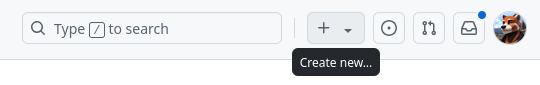

On gitlab, you need to create a **new project**:

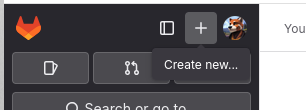

In both cases, once the repo is created, the next step is to add the remote, and send the repo there:

In [28]:
%%bash
# add a remote
git remote add origin git@github.com:pierre-24/test-git-repo.git
# send your stuffs there
# git push -u origin main

**Note:** for this to work, you need to have configured Github/Gitlab with a SSH key. It is good practice to do so.

So the workflow is the following:

+ Every time you create a branch, you need to use `git push -u origin THE_BRANCH`.
+ Every time you create a new commit, perform a merge, or any other action that affect the history, you need to do `git push` (you might need to use `git push -f`, we'll see later when).
+ To retrieve changes that are in the remote but not yet in your local *repo*, use `git pull`.
+ Collaboration (or even working alone on different things at the same time) may result in conflict, so be careful to make changes **in a separate branch**. 



In [29]:
%%bash
# example:
# git push, git pull.

Now you know enough to understand this joke:

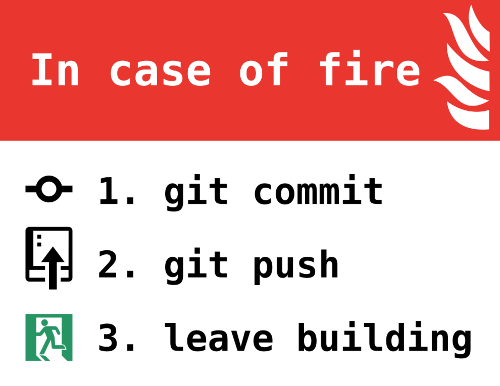

## 3. Collaborating (and working with remotes where you cannot directly write)

xxx.